**1. What is the difference between Bagging and Boosting?**

| Feature           | **Bagging**                                                   | **Boosting**                                                  |
| ----------------- | ------------------------------------------------------------- | ------------------------------------------------------------- |
| **Goal**          | Reduce variance                                               | Reduce bias                                                   |
| **How**           | Trains multiple models **in parallel**                        | Trains models **one after another** (sequential)              |
| **Example**       | Random Forest                                                 | AdaBoost, Gradient Boosting                                   |
| **Model focus**   | Each model is trained independently                           | Each new model fixes the mistakes of the previous ones        |
| **Data Sampling** | Uses **bootstrap sampling** (random samples with replacement) | Uses **weighted data**, focusing more on misclassified points |


**2. How does Random Forest reduce variance?**

- Random Forest trains many decision trees on different random samples of data.
Each tree gives a prediction, and the final output is the average (for regression) or majority vote (for classification).
Since not all trees see the same data or features, their errors are less likely to be the same.
So, when we combine them, the overall model becomes more stable and less affected by the noise in the data.

**3. What is the weakness of boosting-based methods?**

- Overfitting: Boosting can overfit if there is too much noise in the data.
- Slow training: Since boosting trains models one by one, it takes more time.
- Sensitive to outliers: It gives more importance to hard-to-classify samples, which can include outliers.



Task 8: Random Forest vs Decision Tree 
- ● Train a RandomForestClassifier on the same dataset used for Task 5. 
- ● Compare accuracy, precision, and recall with the standalone decision tree. 
- ● Plot feature importances. 

Decision Tree
Accuracy: 0.7988826815642458
Precision: 0.7567567567567568
Recall: 0.7567567567567568
Confusion Matrix:
 [[87 18]
 [18 56]]

Random Forest
Accu 0.8268156424581006
Precision-  0.8115942028985508
Recall-: 0.7567567567567568
Confusion Matrix:
 [[92 13]
 [18 56]]


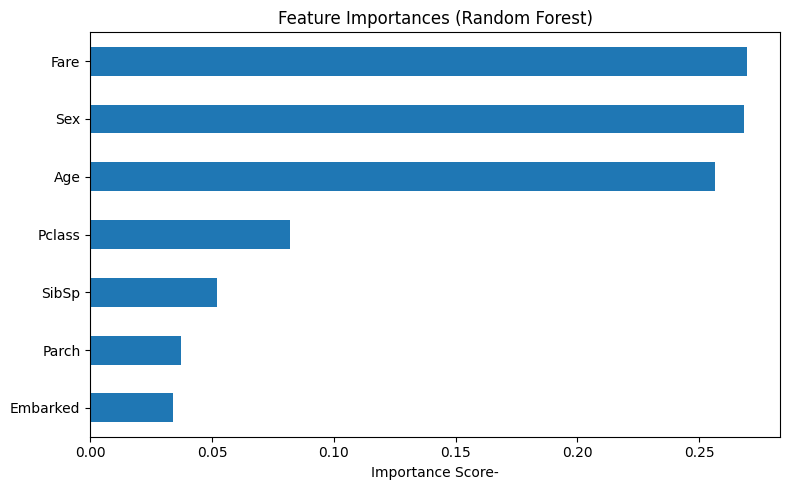

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)
yp_dt = dt.predict(xtest)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
yp_rf = rf.predict(xtest)

print("--Decision Tree--")
print("Accuracy:", accuracy_score(ytest, yp_dt))
print("Precision:", precision_score(ytest, yp_dt))
print("Recall:", recall_score(ytest, yp_dt))
print("Confusion Matrix:\n", confusion_matrix(ytest, yp_dt))

print("\nRandom Forest--")
print("Accu", accuracy_score(ytest, yp_rf))
print("Precision- ", precision_score(ytest, yp_rf))
print("Recall-:", recall_score(ytest, yp_rf))
print("Confusion Matrix:\n", confusion_matrix(ytest, yp_rf))

imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.sort_values().plot(kind='barh', figsize=(8, 5), title='Feature Importances (Random Forest)')
plt.xlabel('Importance Score-')
plt.tight_layout()
plt.show()


Task 9: AdaBoost or Gradient Boosting 
- ● Train an AdaBoostClassifier or GradientBoostingClassifier. 
- ● Use a suitable dataset. 
- ● Compare it with Random Forest and Decision Tree in terms of: 
- ○ Accuracy 
- ○ F1-score 
- ○ Training time (optional)

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

data = load_wine()
x = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

def train_score(model, name):
    t1 = time.time()
    model.fit(xtrain, ytrain)
    t2 = time.time()
    pred = model.predict(xtest)
    acc = accuracy_score(ytest, pred)
    f1 = f1_score(ytest, pred, average='macro')
    print(f"{name:<20}  Acc: {acc:.4f}  F1: {f1:.4f}  Time: {t2 - t1:.4f} sec")

print("\nModel Comparison given-\n")
train_score(dt, "Decision Tree")
train_score(rf, "Random Forest")
train_score(ada, "AdaBoost")
train_score(gb, "Gradient Boosting")



Model Comparison given-

Decision Tree         Acc: 0.9630  F1: 0.9624  Time: 0.0016 sec
Random Forest         Acc: 1.0000  F1: 1.0000  Time: 0.1173 sec
AdaBoost              Acc: 0.9815  F1: 0.9799  Time: 0.1470 sec
Gradient Boosting     Acc: 0.9074  F1: 0.9039  Time: 0.3389 sec
